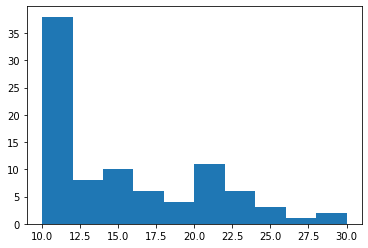

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from functools import reduce
from datetime import datetime

%run ./trace_helps.ipynb

pd.set_option('max_colwidth', 1000)

with open('/home/anthony/TRACE_LOG.TXT') as f:
    reader = csv.reader(f, delimiter='\n')
    dat = []
    a = []
    for row in reader:
        if row != []:
            a.extend(row)
        elif row == []:
            dat.append(a)
            a = []

al = []
for i, x in enumerate(dat):
    if is_norm(x):
        al.append(clean_dat(x, i))

        
full = pd.concat(al).explode('times')
full['times'] = full['times'].astype(float)


FRONT = ['trace_id', 'start', 'end', 'trace_line']
clean = full[FRONT + [x for x in full.columns if x not in FRONT]].drop(['trace_entry', 'whereto'], axis=1)

ROUTE_TIMES = clean.drop_duplicates(subset=['trace_id']).apply(lambda x: x['end'] - x['start'], axis=1)
plt.hist(ROUTE_TIMES / np.timedelta64(1, 's'));